In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.3          ✔ dplyr   1.0.1     
✔ tidyr   1.1.1          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "bank-data-analysis-additional"

## Libraries

In [3]:
library('nnet')
library(corrplot)
library(RColorBrewer)
library(caret)
library(neuralnet)

corrplot 0.84 loaded

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




### Data Loading
Data consists 41188 rows and 21 features

In [4]:
data <- read.csv("../input/bank-data-analysis-additional/Bank_Data.csv")
dim(data)

[1] 41188    21

### Pre-processing

In [5]:
colnames(data)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

In [6]:
summary(data)

      age                 job            marital     
 Min.   :17.00   admin.     :10422   divorced: 4612  
 1st Qu.:32.00   blue-collar: 9254   married :24928  
 Median :38.00   technician : 6743   single  :11568  
 Mean   :40.02   services   : 3969   unknown :   80  
 3rd Qu.:47.00   management : 2924                   
 Max.   :98.00   retired    : 1720                   
                 (Other)    : 6156                   
               education        default         housing           loan      
 university.degree  :12168   no     :32588   no     :18622   no     :33950  
 high.school        : 9515   unknown: 8597   unknown:  990   unknown:  990  
 basic.9y           : 6045   yes    :    3   yes    :21576   yes    : 6248  
 professional.course: 5243                                                  
 basic.4y           : 4176                                                  
 basic.6y           : 2292                                                  
 (Other)            : 1749   

missing values

In [7]:
sapply(data, function(x) sum(is.na(x)))

age            job        marital      education        default 
             0              0              0              0              0 
       housing           loan        contact          month    day_of_week 
             0              0              0              0              0 
      duration       campaign          pdays       previous       poutcome 
             0              0              0              0              0 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
             0              0              0              0              0 
             y 
             0

In [8]:
age <- as.numeric(data$age)
job <- as.numeric(data$job)
education <- as.numeric(data$education)
marital <- as.numeric(data$marital)
default <- as.numeric(data$default)
housing <- as.numeric(data$housing)
loan <- as.numeric(data$loan)
contact <- as.numeric(data$contact)
month <- as.numeric(data$month)
day_of_week <- as.numeric(data$day_of_week)
duration <- as.numeric(data$duration)
campaign <- as.numeric(data$campaign)
pdays <- as.numeric(data$pdays)
previous <- as.numeric(data$previous)
poutcome <- as.numeric(data$poutcome)
emp.var.rate <- as.numeric(data$emp.var.rate)
cons.price.idx <- as.numeric(data$cons.price.idx)
cons.conf.idx <- as.numeric(data$cons.conf.idx)
euribor3m <- as.numeric(data$euribor3m)
nr.employed <- as.numeric(data$nr.employed)
y <- as.numeric(data$y)

In [9]:
df <- data.frame(
    age = unlist(age),
    job = unlist(job),
    education = unlist(education),
    marital = unlist(marital),
    default = unlist(default),
    campaign = unlist(campaign),
    pdays = unlist(pdays),
    previous = unlist(previous),
    poutcome = unlist(poutcome),
    cons.price.idx = unlist(cons.price.idx),
    emp.var.rate = unlist(emp.var.rate),
    cons.conf.idx = unlist(cons.conf.idx),
    euribor3m = unlist(euribor3m),
    nr.employed = unlist(nr.employed),
    y = unlist(y),
    housing = unlist(housing),
    loan = unlist(loan),
    contact = unlist(contact),
    month = unlist(month),
    day_of_week = unlist(day_of_week),
    duration = unlist(duration))

In [10]:
str(df)

'data.frame':	41188 obs. of  21 variables:
 $ age           : num  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : num  4 8 8 1 8 8 1 2 10 8 ...
 $ education     : num  1 4 4 2 4 3 6 8 6 4 ...
 $ marital       : num  2 2 2 2 2 2 2 2 3 3 ...
 $ default       : num  1 2 1 1 1 2 1 2 1 1 ...
 $ campaign      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : num  999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome      : num  2 2 2 2 2 2 2 2 2 2 ...
 $ cons.price.idx: num  94 94 94 94 94 ...
 $ emp.var.rate  : num  1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 ...
 $ cons.conf.idx : num  -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 ...
 $ euribor3m     : num  4.86 4.86 4.86 4.86 4.86 ...
 $ nr.employed   : num  5191 5191 5191 5191 5191 ...
 $ y             : num  1 1 1 1 1 1 1 1 1 1 ...
 $ housing       : num  1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : num  1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : num  2 2 2 2 2 2 2 2 2 2 .

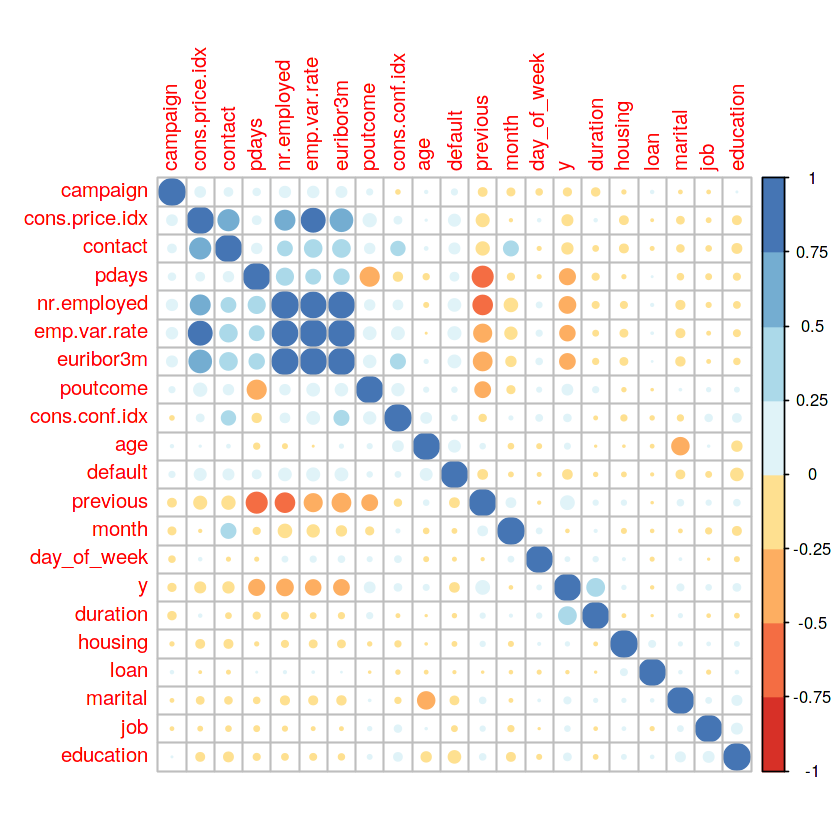

In [11]:
M <-cor(df)
corrplot(M, order="hclust",        
         col=brewer.pal(n=8, name="RdYlBu"))

### Normalizing the data

In [12]:
scaleddata <- scale(df)
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
maxmindf <- as.data.frame(lapply(df, normalize))
maxmindf

age,job,education,marital,default,campaign,pdays,previous,poutcome,cons.price.idx,⋯,cons.conf.idx,euribor3m,nr.employed,y,housing,loan,contact,month,day_of_week,duration
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.48148148,0.27272727,0.0000000,0.3333333,0.0,0.00000000,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0.0,0.0,1,0.6666667,0.25,0.053070354
0.49382716,0.63636364,0.4285714,0.3333333,0.5,0.00000000,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0.0,0.0,1,0.6666667,0.25,0.030296869
0.24691358,0.63636364,0.4285714,0.3333333,0.0,0.00000000,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,1.0,0.0,1,0.6666667,0.25,0.045953640
0.28395062,0.00000000,0.1428571,0.3333333,0.0,0.00000000,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0.0,0.0,1,0.6666667,0.25,0.030703538
0.48148148,0.63636364,0.4285714,0.3333333,0.0,0.00000000,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0.0,1.0,1,0.6666667,0.25,0.062423749
0.34567901,0.63636364,0.2857143,0.3333333,0.5,0.00000000,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0.0,0.0,1,0.6666667,0.25,0.040260268
0.51851852,0.00000000,0.7142857,0.3333333,0.0,0.00000000,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0.0,0.0,1,0.6666667,0.25,0.028263522
0.29629630,0.09090909,1.0000000,0.3333333,0.5,0.00000000,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0.0,0.0,1,0.6666667,0.25,0.044123627
0.08641975,0.81818182,0.7142857,0.6666667,0.0,0.00000000,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,1.0,0.0,1,0.6666667,0.25,0.077267182


### Spliting Data

In [13]:
train.index <- createDataPartition(maxmindf$y, p = .7, list = FALSE)
trainset <- maxmindf[ train.index,]
testset  <- maxmindf[-train.index,]

## Neural Network

In [21]:
nn <- neuralnet(y~., data=trainset, hidden = 4, threshold = 0.01,
  stepmax = 1e+05, rep = 1, startweights = NULL,
  learningrate.limit = NULL, learningrate.factor = list(minus = 0.5,
  plus = 1.2), learningrate = NULL, lifesign = "none",
  lifesign.step = 1000, algorithm = "rprop+", err.fct = "sse",
  act.fct = "logistic", linear.output = TRUE, exclude = NULL,
  constant.weights = NULL, likelihood = FALSE)

nn$result.matrix

error,8.229216e+02
reached.threshold,8.238594e-03
steps,4.860100e+04
Intercept.to.1layhid1,1.535169e+01
age.to.1layhid1,-1.213752e+01
job.to.1layhid1,-7.991474e-01
education.to.1layhid1,2.219151e+00
marital.to.1layhid1,1.433458e-01
default.to.1layhid1,-1.438427e+03
campaign.to.1layhid1,-2.604295e+01
pdays.to.1layhid1,4.053780e+00


In [22]:
plot(nn)

In [23]:
nn$result.matrix

error,8.229216e+02
reached.threshold,8.238594e-03
steps,4.860100e+04
Intercept.to.1layhid1,1.535169e+01
age.to.1layhid1,-1.213752e+01
job.to.1layhid1,-7.991474e-01
education.to.1layhid1,2.219151e+00
marital.to.1layhid1,1.433458e-01
default.to.1layhid1,-1.438427e+03
campaign.to.1layhid1,-2.604295e+01
pdays.to.1layhid1,4.053780e+00


In [30]:
#Test the resulting output
temp_test <- subset(testset)
head(temp_test)
nn.results <- compute(nn, temp_test)
results <- data.frame(actual = testset$y, prediction = nn.results$net.result)


,age,job,education,marital,default,campaign,pdays,previous,poutcome,cons.price.idx,⋯,cons.conf.idx,euribor3m,nr.employed,y,housing,loan,contact,month,day_of_week,duration
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4814815,0.27272727,0.0000000,0.3333333,0.0,0,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0,0,1,0.6666667,0.25,0.05307035
2,0.4938272,0.63636364,0.4285714,0.3333333,0.5,0,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0,0,1,0.6666667,0.25,0.03029687
3,0.2469136,0.63636364,0.4285714,0.3333333,0.0,0,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,1,0,1,0.6666667,0.25,0.04595364
5,0.4814815,0.63636364,0.4285714,0.3333333,0.0,0,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0,1,1,0.6666667,0.25,0.06242375
8,0.2962963,0.09090909,1.0000000,0.3333333,0.5,0,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,0,0,1,0.6666667,0.25,0.04412363
16,0.4567901,0.45454545,0.2857143,0.3333333,0.5,0,1,0,0.5,0.6987529,⋯,0.6025105,0.9573793,0.8597353,0,1,1,1,0.6666667,0.25,0.03538024


## Confusion Matrix

In [31]:
roundedresults<-sapply(results,round,digits=0)
roundedresultsdf=data.frame(roundedresults)
attach(roundedresultsdf)
table(actual,prediction)

The following objects are masked from roundedresultsdf (pos = 3):

    actual, prediction


The following objects are masked from roundedresultsdf (pos = 4):

    actual, prediction


The following objects are masked from roundedresultsdf (pos = 5):

    actual, prediction




      prediction
actual     0     1
     0 10569   399
     1   650   738